In [417]:
#Librerias
import pandas as pd #lectura datos
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#import metricas para evaluacion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#clasificadores
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)



In [418]:
#Carga de datos 
data=pd.read_csv("pishingdata.csv")
#eliminamos primera fila id
del(data['id'])
data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [419]:
#info
print(data.shape)

(1353, 10)


(1353, 10)
-1    702
 1    548
 0    103
Name: Result, dtype: int64


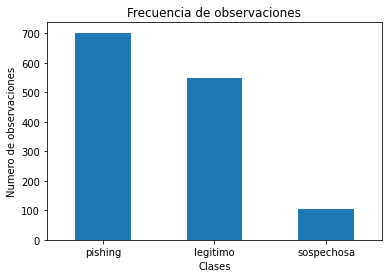

In [420]:
LABELS=["pishing","legitimo","sospechosa"]
print(data.shape)
print(pd.value_counts(data['Result'], sort = True))

count_classes = pd.value_counts(data['Result'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(3), LABELS)
plt.title("Frecuencia de observaciones")
plt.xlabel("Clases")
plt.ylabel("Numero de observaciones");

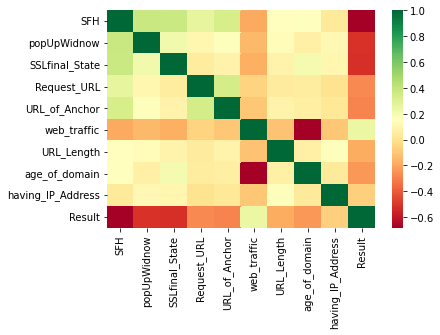

In [421]:
correlacion=data.corr()
correlacion['Result'].sort_values(ascending=False)
sns.heatmap(correlacion,xticklabels=correlacion.columns.values,yticklabels=correlacion.columns.values,cmap='RdYlGn')

In [422]:
#separando datos en variables dependientes e independientes
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [423]:
# Introducir las bibliotecas necesarias graficar roc

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# Binarizar la etiqueta
y = label_binarize(y, classes=[1,2,3])
# Establecer tipo
n_classes = y.shape[1]


In [424]:
#genera matrices de confucion para comparacion

def matrizconfusion(matriz):
  matriz1=[]
  matriz2=[]
  matriz3=[]
  aux=[]

  x1=int(matriz[0][0])
  x2=int(matriz[0][1]) + int(matriz[0][2])
  x3=int(matriz[1][0]) +int(matriz[2][0])
  x4=int(matriz[1][1]) +int(matriz[1][2])+int(matriz[2][1]) +int(matriz[2][2])

  matriz1=[[x1,x2],[x3,x4]]

  x1=int(matriz[1][1])
  x2=int(matriz[1][0]) + int(matriz[1][2])
  x3=int(matriz[0][1]) +int(matriz[2][1])
  x4=int(matriz[0][0]) +int(matriz[0][2])+int(matriz[2][0]) +int(matriz[2][2])
  matriz2=[[x1,x2],[x3,x4]]
  

  x1=int(matriz[2][2])
  x2=int(matriz[2][0]) + int(matriz[2][1])
  x3=int(matriz[0][2]) +int(matriz[1][2])
  x4=int(matriz[0][0]) +int(matriz[0][1])+int(matriz[1][0]) +int(matriz[1][1])
  matriz3=[[x1,x2],[x3,x4]]

  print("\n\n")
  for i in matriz1:
    print(i)
  print("\n")
  for i in matriz2:
    print(i)
  print("\n")
  for i in matriz3:
    print(i)
  



In [425]:
#reportes
def reporte(y_pred):
  print("Reporte de clasificacion",classification_report(y_test, y_pred))
  print("matriz de confusion: \n",confusion_matrix(y_test, y_pred))

In [426]:
#arboles de clasificacion con desbalanceo
clasificador=DecisionTreeClassifier()
clasificador.fit(X_train,y_train)
y_pred=clasificador.predict(X_test)
matriz=confusion_matrix(y_test, y_pred)

matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)



Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.87      0.88      0.87       137
           0       0.90      0.90      0.90        21
           1       0.85      0.84      0.84       113

    accuracy                           0.86       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.86      0.86      0.86       271

matriz de confusion: 
 [[120   1  16]
 [  1  19   1]
 [ 17   1  95]]



[120, 17]
[18, 116]


[19, 2]
[2, 248]


[95, 18]
[17, 141]


In [427]:
#balanceando las clases
clasificador=DecisionTreeClassifier(class_weight="balanced")
clasificador.fit(X_train,y_train)
y_pred=clasificador.predict(X_test)

matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)




Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.90      0.85      0.88       137
           0       0.88      1.00      0.93        21
           1       0.85      0.88      0.86       113

    accuracy                           0.87       271
   macro avg       0.87      0.91      0.89       271
weighted avg       0.88      0.87      0.87       271

matriz de confusion: 
 [[117   2  18]
 [  0  21   0]
 [ 13   1  99]]



[117, 20]
[13, 121]


[21, 0]
[3, 247]


[99, 14]
[18, 140]


In [428]:
#Svm
clasificador=SVC()
clasificador.fit(X_train,y_train)
y_pred=clasificador.predict(X_test)

matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)

Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.87      0.88      0.88       137
           0       1.00      0.19      0.32        21
           1       0.76      0.86      0.80       113

    accuracy                           0.82       271
   macro avg       0.88      0.64      0.67       271
weighted avg       0.83      0.82      0.80       271

matriz de confusion: 
 [[121   0  16]
 [  2   4  15]
 [ 16   0  97]]



[121, 16]
[18, 116]


[4, 17]
[0, 250]


[97, 16]
[31, 127]


In [429]:
#Svm
clasificador=SVC(C=10, gamma=0.6,class_weight="balanced")
clasificador.fit(X_train,y_train)
y_pred=clasificador.predict(X_test)

matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)



Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.91      0.86      0.88       137
           0       0.95      0.95      0.95        21
           1       0.84      0.89      0.87       113

    accuracy                           0.88       271
   macro avg       0.90      0.90      0.90       271
weighted avg       0.88      0.88      0.88       271

matriz de confusion: 
 [[118   0  19]
 [  1  20   0]
 [ 11   1 101]]



[118, 19]
[12, 122]


[20, 1]
[1, 249]


[101, 12]
[19, 139]


In [430]:
clf_rf = RandomForestClassifier(class_weight="balanced")

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

#Resumende predicciones hechas
matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)


Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.88      0.88      0.88       137
           0       0.95      0.90      0.93        21
           1       0.84      0.86      0.85       113

    accuracy                           0.87       271
   macro avg       0.89      0.88      0.89       271
weighted avg       0.87      0.87      0.87       271

matriz de confusion: 
 [[120   0  17]
 [  1  19   1]
 [ 15   1  97]]



[120, 17]
[16, 118]


[19, 2]
[1, 249]


[97, 16]
[18, 140]


In [431]:
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=5, max_depth=5, learning_rate=0.1)

clf_gb.fit(X_train, y_train)
y_pred = clf_gb.predict(X_test)
#Resumende predicciones hechas
matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)


Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.86      0.88      0.87       137
           0       0.90      0.86      0.88        21
           1       0.84      0.83      0.84       113

    accuracy                           0.86       271
   macro avg       0.87      0.85      0.86       271
weighted avg       0.86      0.86      0.86       271

matriz de confusion: 
 [[120   0  17]
 [  2  18   1]
 [ 17   2  94]]



[120, 17]
[19, 115]


[18, 3]
[2, 248]


[94, 19]
[18, 140]


In [432]:
clf_xgb = xgb.XGBClassifier(class_weight="balanced")

clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

#Resumende predicciones hechas
matriz=confusion_matrix(y_test, y_pred)
reporte(y_pred)
matrizconfusion(matriz)




Reporte de clasificacion               precision    recall  f1-score   support

          -1       0.88      0.90      0.89       137
           0       0.87      0.62      0.72        21
           1       0.84      0.87      0.85       113

    accuracy                           0.86       271
   macro avg       0.86      0.79      0.82       271
weighted avg       0.86      0.86      0.86       271

matriz de confusion: 
 [[123   2  12]
 [  1  13   7]
 [ 15   0  98]]



[123, 14]
[16, 118]


[13, 8]
[2, 248]


[98, 15]
[19, 139]


In [433]:
# Binarizar la etiqueta
y = label_binarize(y, classes=[-1,0,1])
# Establecer tipo
n_classes = y.shape[1]
# Entrene el modelo y prediga
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)



/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/

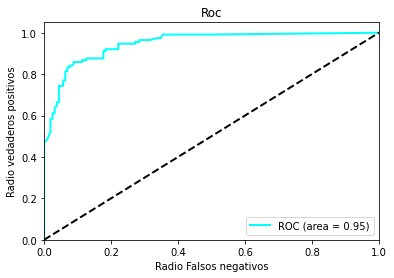

In [434]:

# arbol de decicion

classifier = OneVsRestClassifier(DecisionTreeClassifier(class_weight="balanced"))
y_score = classifier.fit(X_train, y_train).predict_proba (X_test)


# svm
classifier = OneVsRestClassifier(SVC(C=10, gamma=0.6,class_weight="balanced",probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# random forest
classifier = OneVsRestClassifier(RandomForestClassifier(class_weight="balanced"))
y_score = classifier.fit(X_train, y_train).predict_proba (X_test)

"""
# gradientboost
classifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1))
y_score = classifier.fit(X_train, y_train).predict_proba (X_test)

# XGboost
classifier = OneVsRestClassifier(xgb.XGBClassifier(n_estimators=100,max_depth=5, learning_rate=0.1,class_weight="balanced"))
y_score = classifier.fit(X_train, y_train).predict_proba (X_test)
"""

# Calcule la ROC de cada categoría
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

"""
# Calcular la curva ROC y el área ROC de micropromedio (2)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Calcule la curva ROC macro-promedio y el área ROC (1)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


mean_tpr /= n_classes

lw=2
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         label='promedio curva ROC  (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
"""
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Radio Falsos negativos')
plt.ylabel('Radio vedaderos positivos')
plt.title('Roc')
plt.legend(loc="lower right")
plt.show()
